In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [19]:
def load_data(data_dir):
    images = []
    labels = []
    for label in ['Bus', 'Car', 'motorcycle', 'Truck']:
        class_dir = os.path.join(data_dir, label)
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels)

In [5]:
X, y = load_data('dataset')

c:\Users\sulav\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [22]:
y = le.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [25]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

In [26]:
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

classifier = Sequential([
    Flatten(input_shape=X_train_features.shape[1:]),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='sigmoid')
])

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\sulav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
history = classifier.fit(X_train_features, y_train, epochs=10, validation_data=(X_test_features, y_test))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5175 - loss: 32.6188 - val_accuracy: 0.8625 - val_loss: 5.0245
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9088 - loss: 9.0537 - val_accuracy: 0.8875 - val_loss: 6.3835
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9651 - loss: 1.9833 - val_accuracy: 0.9250 - val_loss: 4.4634
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9826 - loss: 0.7379 - val_accuracy: 0.9375 - val_loss: 5.8396
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9909 - loss: 0.3238 - val_accuracy: 0.9250 - val_loss: 5.7447
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9250 - val_loss: 5.7472
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9845 - loss: 0.2987 - val_accuracy: 0.9125 - val_loss: 4.3106
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9978 - loss: 0.0544 - val_accuracy: 0.9125 - 

In [29]:
import matplotlib.pyplot as plt

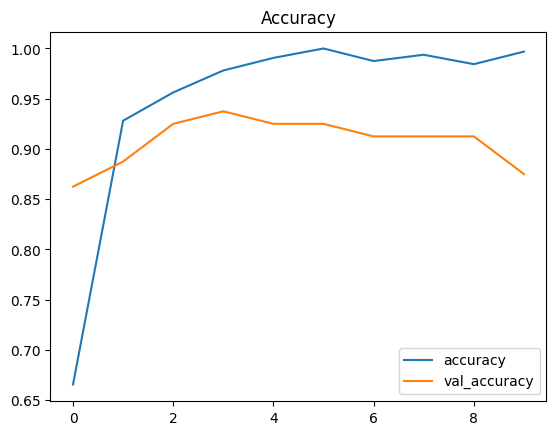

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [31]:
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    img_features = feature_extractor.predict(img_array)
    predictions = classifier.predict(img_features)
    predicted_class = le.inverse_transform([np.argmax(predictions)])
    return predicted_class[0]

In [34]:
test_image_path = 'test_img/vehicle.jpg'
predicted_class = predict_image(test_image_path)
predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


np.str_('Car')

In [35]:
test_image_path = 'test_img/images.jpg'
predicted_class = predict_image(test_image_path)
predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


np.str_('Truck')

In [36]:
test_image_path = 'test_img/images1.jpg'
predicted_class = predict_image(test_image_path)
predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


np.str_('Truck')